We are working on the project: https://www.kaggle.com/competitions/dog-breed-identification/overview

# Neural Network: Deep Learning, Transfer Learning and TensorFlow

## This notebook builds an end-to-end multi class image classifier using TensorFlow 2.O and TensorFlow Hub.

### 1. Problem:
Identifying the breed of the dog given an image of it.
> What we are dealing with is basically multi-class classification as we are predicting various breeds.

> It could have also been binary classification (for eg, differentiating Cats vs Dogs).

### 2. Data:
The data is taken from the same competition on Kaggle:
https://www.kaggle.com/competitions/dog-breed-identification/data
### 3. Evaluation:
https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation
### 4. Features:
* We're dealing with images (unstructured data) so it's best to use deep learning/transfer learning.
* We are given 120 different breeds of dogs that means there are 120 different classes.
* There are around 10,000 images in the training dataset (They are labeled as the model is to be trained upon).
* There are around 10,000 images in the test dataset (They are not labeled as we have to predict them).

In [ ]:
# unzip the .zip floder inside google drive
# !unzip "/content/drive/MyDrive/UDEMY ZTM Neural Network/dog-breed-identification.zip" -d "/content/drive/MyDrive/UDEMY ZTM Neural Network"

### Getting our Workspace Ready!
1. import TensorFlow 2.x
2. import TensorFlow Hub
3. Make sure we're using GPU

In [ ]:
# # Importing TensorFlow inside Colab
# import tensorflow as tf
# print("TF Version: ", tf.__version__)

In [ ]:
# pip install tf-keras


In [ ]:
# import os
# os.environ["TF_USE_LEGACY_KERAS"] = "1"


In [ ]:
# # importing TensorFlow Hub
# import tensorflow_hub as hub
# print("TF Hub: ", hub.__version__)

In [ ]:
!pip show tf-keras
!pip show tensorflow_hub
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version:", tf.__version__)
print("TF Hub Version:", hub.__version__)


Name: tf_keras
Version: 2.19.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: tensorflow
Required-by: dopamine_rl, tensorflow-hub, tensorflow_decision_forests
Name: tensorflow-hub
Version: 0.16.1
Summary: TensorFlow Hub is a library to foster the publication, discovery, and consumption of reusable parts of machine learning models.
Home-page: https://github.com/tensorflow/hub
Author: Google LLC
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: numpy, protobuf, tf-keras
Required-by: 
TF Version: 2.19.0
TF Hub Version: 0.16.1


In [ ]:
# Let's see if we're working on GPU
print("GPU", "available YESSS!!!" if tf.config.list_physical_devices("GPU") else "Naa hai laadle!")

GPU Naa hai laadle!


## Getting Our Data Ready (Turning into Tensors).
With all the ML models, our data has to be numeric, so that's what we'll be doing first, Turning images into Tensors (Numerical representation)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Checking the labels
labels_csv = pd.read_csv("/content/drive/MyDrive/UDEMY ZTM Neural Network/labels.csv")
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


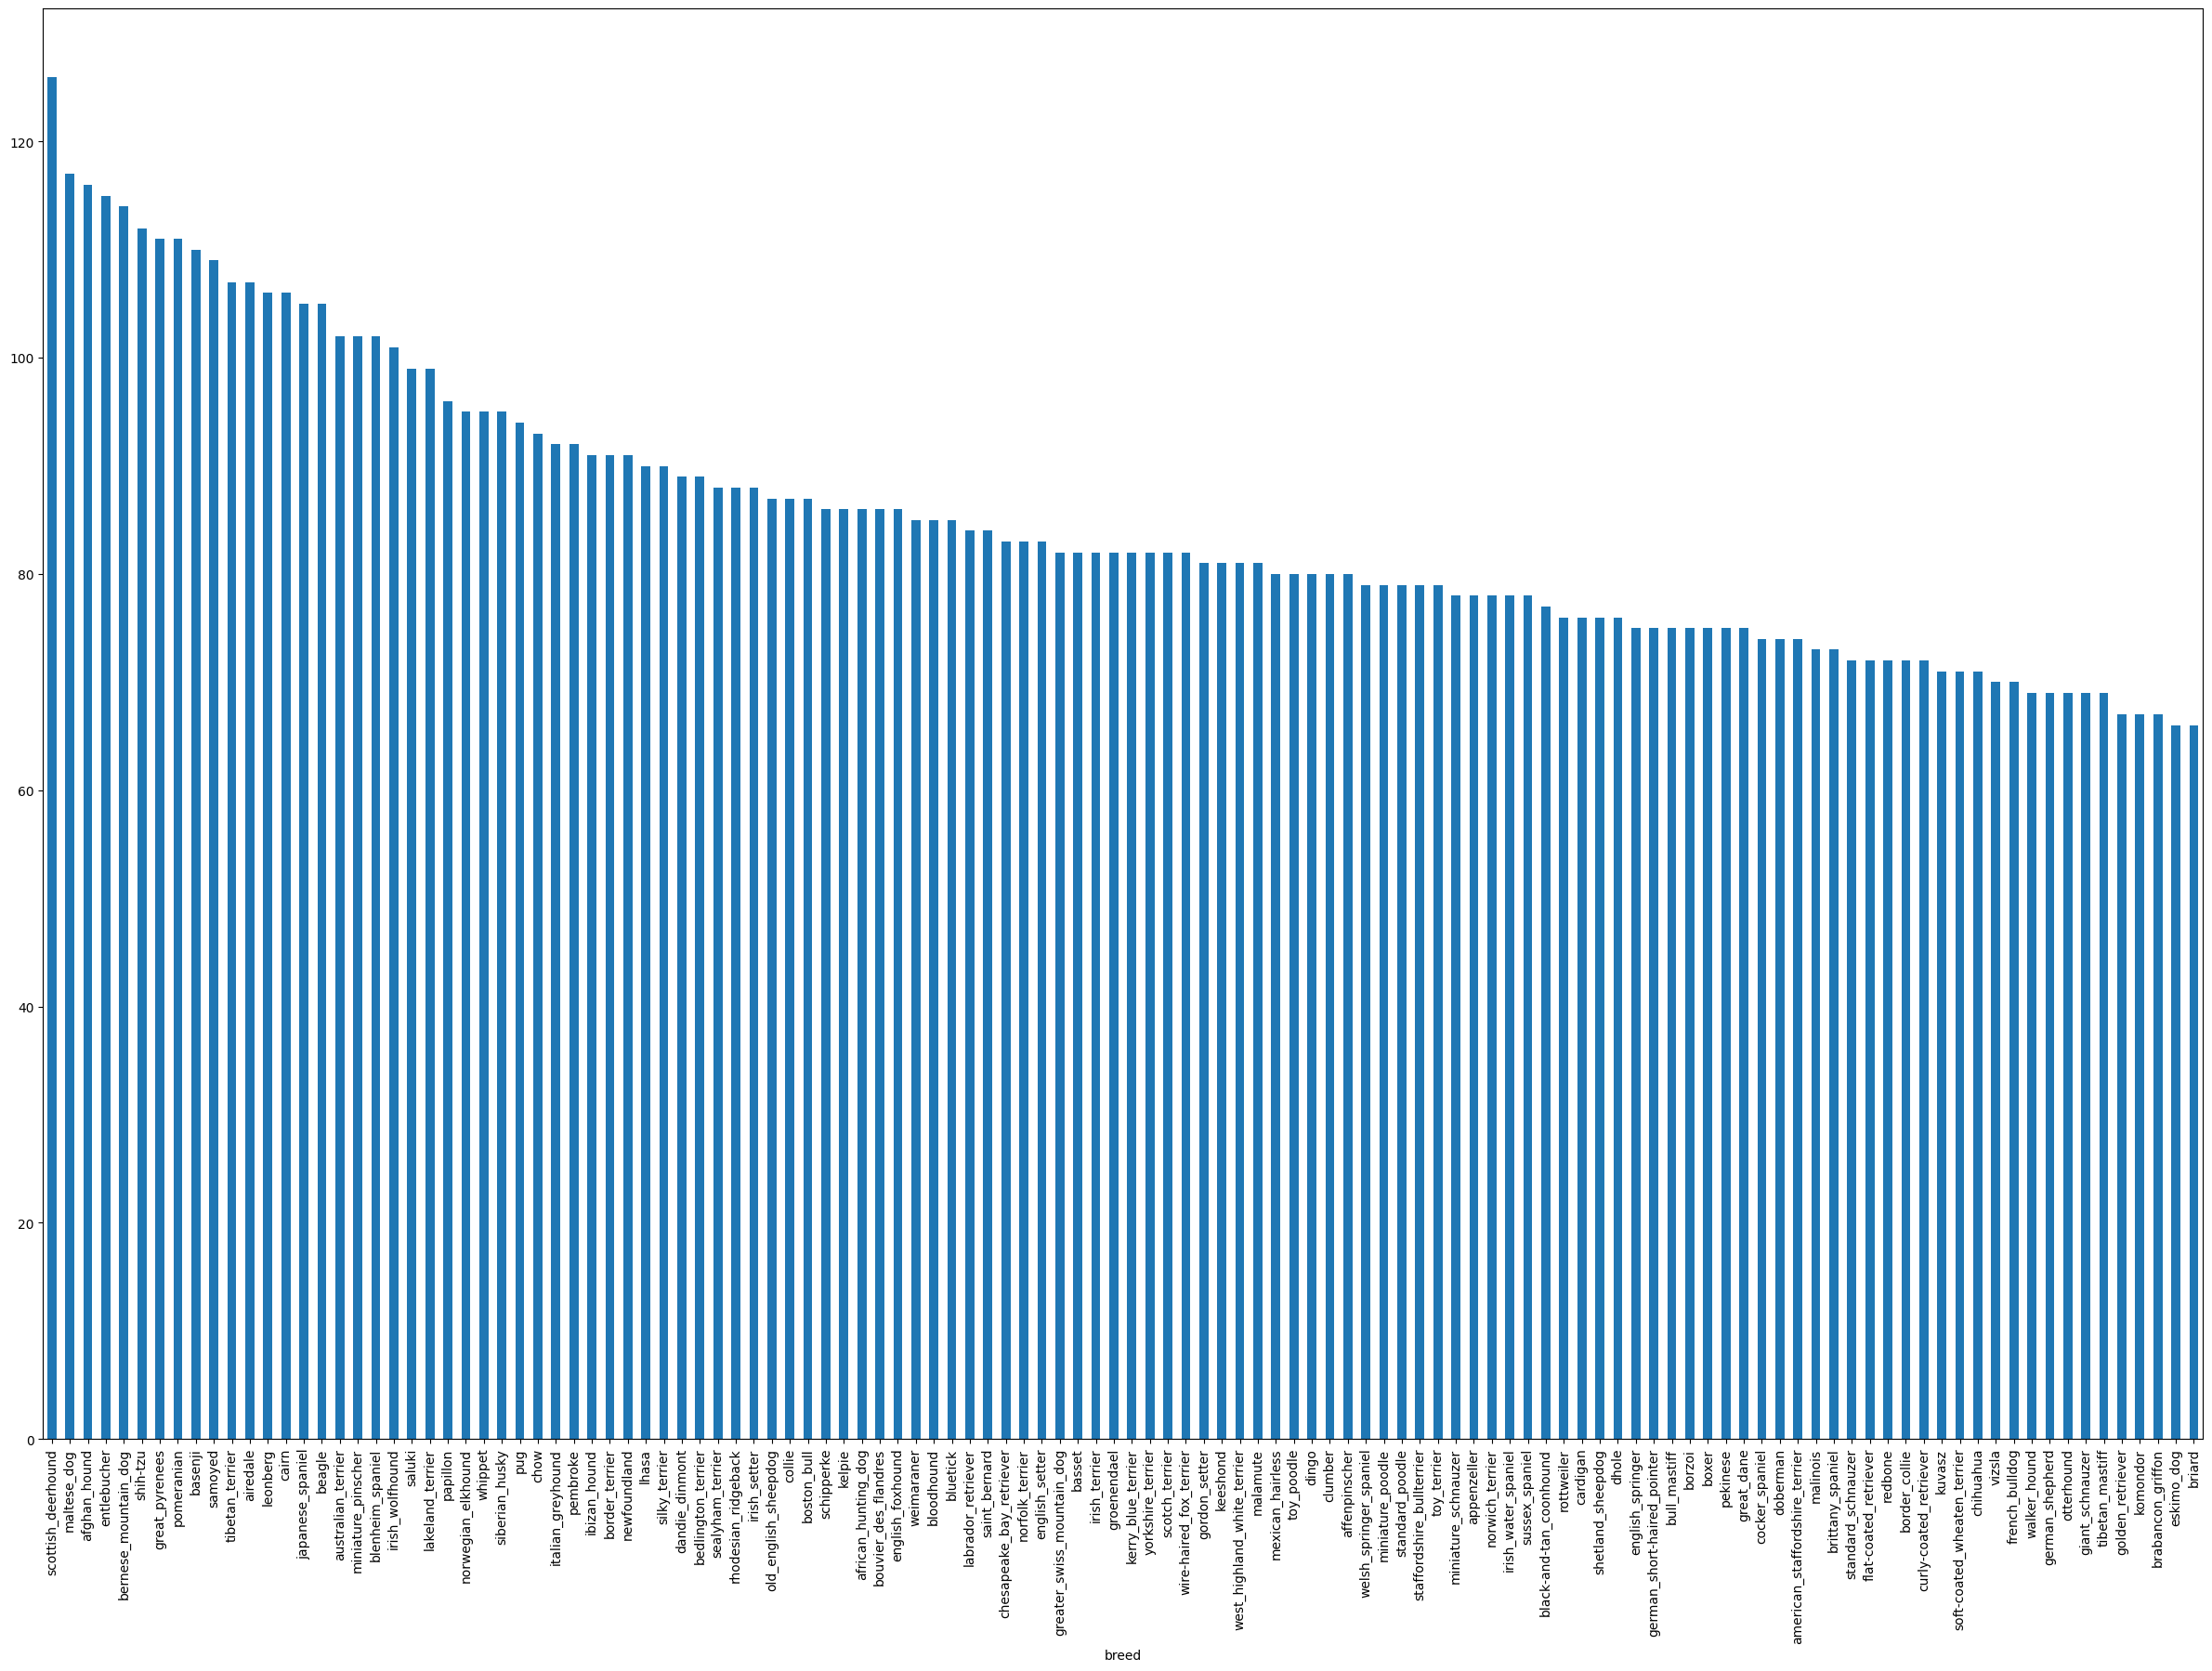

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize= (30, 20));

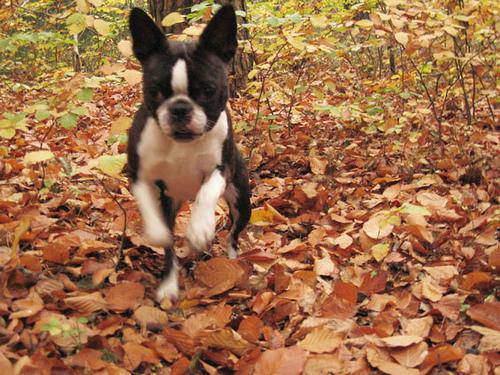

In [ ]:
# Let's view an image
from IPython.display import Image
Image("/content/drive/MyDrive/UDEMY ZTM Neural Network/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

### Getting images and their labels
Getting the filepaths of all the images

In [ ]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
# Filenames for all the id's inside labels
filename = ["/content/drive/MyDrive/UDEMY ZTM Neural Network/train/" + id for id in labels_csv["id"] + ".jpg"]
filename[ : 10]

['/content/drive/MyDrive/UDEMY ZTM Neural Network/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

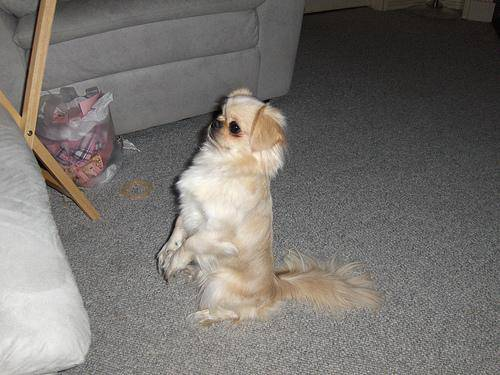

In [ ]:
from IPython.display import Image
Image(filename[2])

In [ ]:
len(filename), len(labels_csv)

(10222, 10222)

In [ ]:
import os
os.listdir("/content/drive/MyDrive/UDEMY ZTM Neural Network/train")

['e79f822b26adace4455db1fcd94ab47e.jpg',
 'e517cb6c5a2942b6a1b545e84551372f.jpg',
 'e47a26a0b4510b25250f654577207ed3.jpg',
 'df464ebe3f311744241cb3d9258a5000.jpg',
 'e4cb3bc8fc0dd15216e26c00a7b17d81.jpg',
 'dbe9a2868d227a12197fb6c44b93d85a.jpg',
 'e59ba8576716c823f7731385d802fd49.jpg',
 'e297c765ac7e6c1d7c4657c7e72b1544.jpg',
 'e237f2c2da59abcb4d622106db8eef11.jpg',
 'e17f3e7d3d1468c34643e60cb622e935.jpg',
 'de2c9754f0687fc8d0922b990d274777.jpg',
 'e58763e5a8e37bcede344260eb20f26d.jpg',
 'e00443152fb5951922730b21ba08f8f5.jpg',
 'e0764f7b42ad2336c96d414b419af335.jpg',
 'e994ab08b7d68114beb65a3784c08be6.jpg',
 'e5757684859b44aa875efd4d67661399.jpg',
 'e12986379661597e7c287008c89f4ea6.jpg',
 'def67b643b92ee3d6cdec1128df0a9b6.jpg',
 'e201fdbcd92e3d0a10d612d5e0b77b35.jpg',
 'e224c29118a187dccba77b4aaa355767.jpg',
 'e2b39eb9cb8b34303cc3527f8f8df9d6.jpg',
 'e795a13bbfa8a72daeb315646f83068a.jpg',
 'e82fa6e85fd570b2f766635eed62fdf4.jpg',
 'e2ac9b607458c25b1422271887f27e35.jpg',
 'e79578de293a0b

In [ ]:
if len(os.listdir("/content/drive/MyDrive/UDEMY ZTM Neural Network/train")) == len(filename):
  print("Filenames match actual amount of files. Procees!")
else:
  print("len of filenames do not match the actual target directory.")

Filenames match actual amount of files. Procees!


9000    tibetan_mastiff
Name: breed, dtype: object


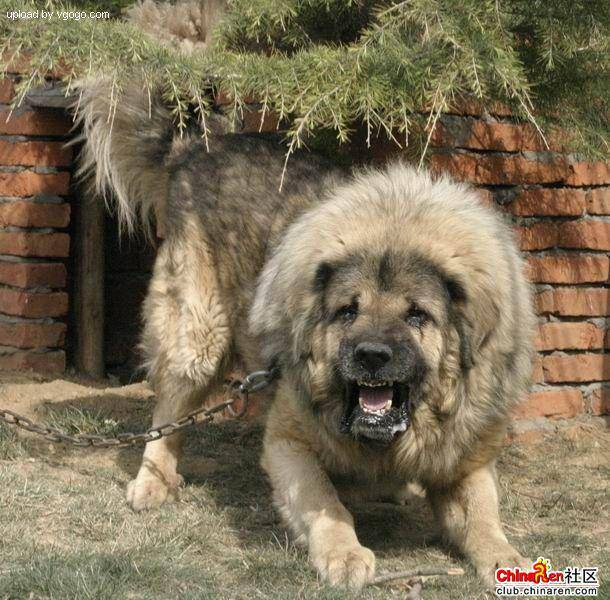

In [ ]:
from IPython.display import Image
print(labels_csv[9000 : 9001]["breed"]);
Image(filename[9000])

8999    papillon
Name: breed, dtype: object


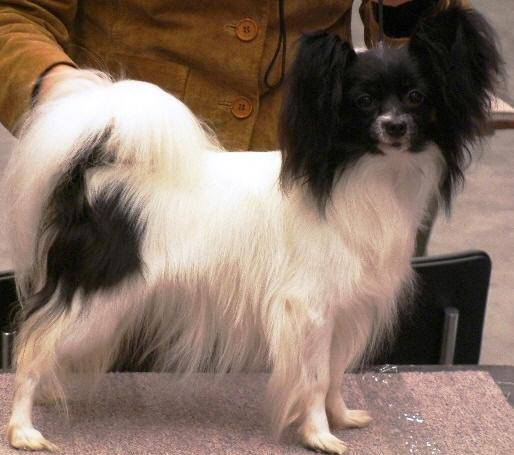

In [ ]:
print(labels_csv[8999 : 9000]["breed"])
Image(filename[8999])

In [ ]:
# For the breed names inside the label_csv
labels = labels_csv["breed"]
labels = np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# Checking if the filenames (number of images and their paths) equals to the labels (breed names)
if (len(labels) == len(filename)):
  print("Hurray! Number of labels matches to that of filenames!")

else:
  print("Number of labels does not match to that of filenames! Check the directory")

Hurray! Number of labels matches to that of filenames!


In [ ]:
unique_labels = pd.unique(labels)
len(unique_labels)

120

In [ ]:
# Turning labels into boolean values
boolean_labels = [label == unique_labels for label in labels]
boolean_labels[ : 2]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False,  True, False, False, False, Fal

In [ ]:
boolean_labels[2 : 4]

[array([False, False,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False,  True, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
filename[ : 10]

['/content/drive/MyDrive/UDEMY ZTM Neural Network/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

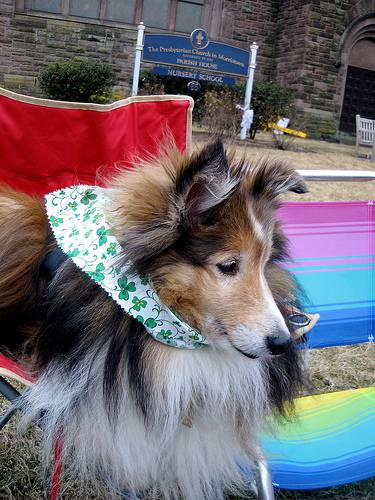

In [ ]:
Image(filename[10])

#### Preparing our X and y and then train and validation set

In [ ]:
# Preparing our X and y and then train and validation set
X = filename          # IMAGES of dogs whose breed to be predicted
y = boolean_labels    # Breeds of the dogs

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
len(filename) == len(boolean_labels)

True

In [ ]:
boolean_labels[ : 1]

[array([ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

In [ ]:
boolean_labels[1 : 2]

[array([False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False])]

#### Train Test Split
Splitting our data into train and validation set:
We'll start with first 1000 samples only...Later we can keep on increasing.


In [ ]:
NUM_SAMPLES = 1000 #@param {type : "slider", min : 1000, max : 10000, step : 1000}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X[ : NUM_SAMPLES],
                                                                y[ : NUM_SAMPLES],
                                                                test_size=0.2,
                                                                random_state = 42)

splits = [X_train, X_validation, y_train, y_validation]
for split in splits:
   print(len(split))

800
200
800
200


#### PREPROCESSING THE DATA (Turning images into Tensors):
Note : The function here is going to be for images but will almost be same for anyother type like audio files as well.
In machine learning, data types such as images are commonly represented as multi-dimensional arrays, or tensors, before being used to train models.

To Preprocess our images into tensors, we are going to make a func that does the following:
1. Take an image filepath as input.
2. Use TensorFlow to read a file and save it to a variable `image`.
3. Turn the image (jpg) into tensors.
4. Resize the image to be of the shape of (224, 224). The value is arbitary but its imp to make the size of image in square and all the image sizes constants.
5. Return the modified `image`.

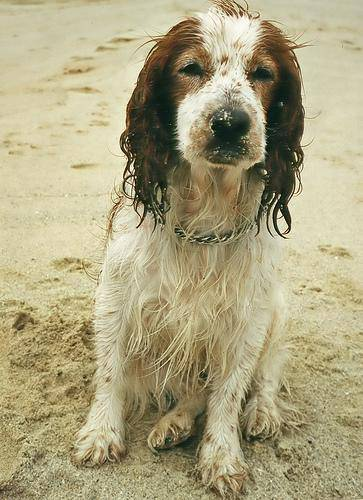

In [ ]:
# Let's see an eg converting an image to tensor using tensorflow

Image(filename[210])

In [ ]:
from matplotlib.pyplot import imread
image = imread(filename[210])        # converted the entire image into array of numbers.
image[ : 2]

array([[[171, 160, 115],
        [174, 163, 118],
        [178, 167, 122],
        ...,
        [192, 190, 167],
        [192, 190, 167],
        [192, 190, 167]],

       [[180, 169, 124],
        [179, 171, 125],
        [184, 173, 128],
        ...,
        [191, 189, 166],
        [191, 189, 166],
        [191, 189, 166]]], dtype=uint8)

In [ ]:
# Turning the array of numbers into Tensor
Tensor_image = tf.constant(image)
Tensor_image[ : 2]

<tf.Tensor: shape=(2, 363, 3), dtype=uint8, numpy=
array([[[171, 160, 115],
        [174, 163, 118],
        [178, 167, 122],
        ...,
        [192, 190, 167],
        [192, 190, 167],
        [192, 190, 167]],

       [[180, 169, 124],
        [179, 171, 125],
        [184, 173, 128],
        ...,
        [191, 189, 166],
        [191, 189, 166],
        [191, 189, 166]]], dtype=uint8)>

We say, how the image looks as Tensor, Let's make the function:
To Preprocess our images into tensors, we are going to make a func that does the following:

1. Take an image filepath as input.
2. Use TensorFlow to read a file and save it to a variable image.
3. Turn the image (jpg) into tensors.
4. Normalize the image color channels from 0-255 into 0-1
5. Resize the image to be of the shape of (224, 224). The value is arbitary but its imp to make the size of image in square and all the image sizes constants.
6. Return the modified image.

In [ ]:
image_size = 224
def process_image(image_path, image_size = 224):


  # Reading the image from the filepath
  image = tf.io.read_file(image_path)
  # Turning the jpeg image into numerical Tensors with 3 color channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the image color channels from value 0 - 255 to 0 - 1
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our dezired value
  image = tf.image.resize(image, size = [image_size, image_size])

  return image

#### Turning our Tensors into Batches

**Why turn our data into batches?**

In machine learning, data is divided into batches primarily to manage computational resources and improve training efficiency. Processing an entire dataset at once requires storing all data and associated derivative values, like loss, in memory, which is often impractical for large datasets and can lead to high memory usage and slow training speeds.

By splitting data into smaller batches, models can be trained incrementally, updating their parameters after processing each batch, which significantly reduces memory requirements and allows for more frequent parameter updates.

This approach, known as mini-batch gradient descent, is the most common method for training deep learning models because it strikes a balance between the computational cost of full batch training and the instability of online learning.


---


**How these batches look in TensorFlow?**

We pass 32 (This is the batch size, which may vary but 32 is recommended) tuples as of `(image, label)` at a time.


In [ ]:
# A func to return the tuple `(image, label)`
def image_label(image_path, label):
  """
  Takes the image_path (filepath of image) and the associated label
  And turn this into tuple (image, label)
  """
  image = process_image(image_path)
  return (image, label)

In [ ]:
# Function to turn all of our data (X and y) into batches.
BATCH_SIZE = 32

def create_data_batches(X, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  """
  Create batches of data out of image (X) and (y) pairs.
  Shuffles the data if its training data but dosen't shuffles if its validation or test data.
  Also accepts test data as input (no labels).
  """
  # if its a test data, we dont have any labels
  if test_data:
    print("Creating the test batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))  # Only Filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating the validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    data_batch =  data.map(image_label).batch(BATCH_SIZE)

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels
    data = data.shuffle(buffer_size=len(X))

    # Create (image, label) tuples, This also preprocess the image path into processed image
    data = data.map(image_label)

    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)

  return data_batch

In [ ]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_validation, y_validation, valid_data = True)

Creating training data batches...
Creating the validation data batches...


In [ ]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
# Let's visulaize the data splits
import matplotlib.pyplot as plt
# Making a func that makes 25 images out of the data batch
def make_25_images(images, label):

  plt.figure(figsize = (13, 9))
  for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.title(unique_labels[label[i].argmax()])
    # Turning the grid lines off
    plt.axis("off")

In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
train_image, train_label = next(train_data.as_numpy_iterator())


In [ ]:
len(train_image), len(train_label)   # BECAUSE WE HAVE MADE PATCHES OF 32

(32, 32)

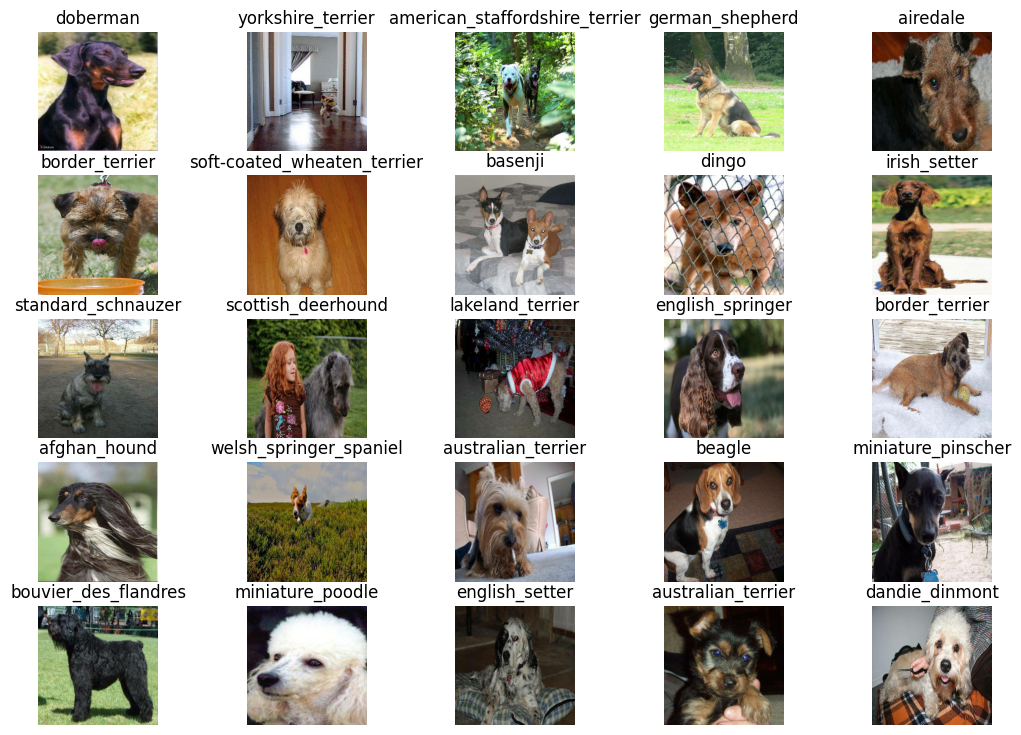

In [ ]:
make_25_images(train_image, train_label)

In [ ]:
val_image, val_label = next(val_data.as_numpy_iterator())
len(val_image), len(val_label)

(32, 32)

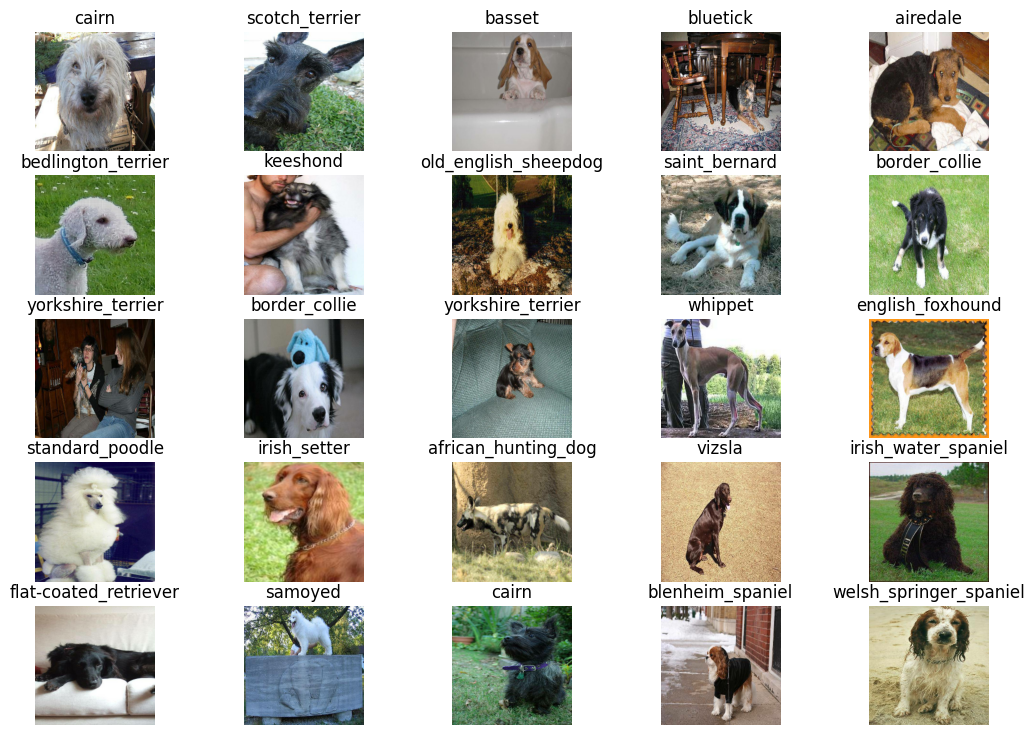

In [ ]:
make_25_images(val_image, val_label)

## Building a Model
Before we build a model, there are few things, we need to define:
* The input shape (of images and labels in the form of Tensors) to the model.
* The output shape (of the image labels in the form of Tensors) of the model.
* The URL of the model we want to use. We can refer: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2

In [ ]:
# Setup input shape of the model
INPUT_SHAPE = [None, image_size, image_size, 3]  # Batch, Height, Width, Color channel

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_labels)

# Steup model URL from Tensorflow Hub
# MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2"

### Now we've got our INPUT, OUTPUT, and model ready to go, Let's put them together into Keras Deep Learning model!

Let's create a func to do that:
* Takes the INPUT_SHAPE, OUTPUT_SHAPE and the model we have chosen as parameters.
* Defines the layers in Keras model in sequential fashion.
* Compiles the model (says it should be evaluated and improved).
* Builds the model (tells the model the input shape it'll be getting).
* Return the model.

In [ ]:
# Creating a func which builds a Keras model
# def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
#   # Setup the model layer
#   model = tf.keras.Sequential([hub.KerasLayer(model_url),
#                                tf.keras.layers.Dense(units = output_shape,
#                                                      activation = "softmax")
#   ])
#   # Compile the model
#   model.compile(
#       loss = tf.keras.losses.CategoricalCrossentropy(),
#       optimizer = tf.keras.optimizers.Adam(),
#       metrics = ["accuracy"]
#   )
#   # Building the model
#   model.build(input_shape)

#   return model



NameError: name 'INPUT_SHAPE' is not defined

In [ ]:
# model = create_model()
# model.summary()

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

INPUT_SHAPE = (image_size, image_size, 3)
OUTPUT_SHAPE = len(unique_labels)
# MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/feature_vector/4"
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2"

# Custom wrapper to ensure compatibility
class HubLayer(tf.keras.layers.Layer):
    def __init__(self, hub_url, input_shape):
        super(HubLayer, self).__init__()
        self.hub_layer = hub.KerasLayer(hub_url, input_shape=input_shape, trainable=False)

    def call(self, inputs):
        return self.hub_layer(inputs)

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=input_shape),
        HubLayer(model_url, input_shape),
        tf.keras.layers.Dense(output_shape, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.CategoricalCrossentropy(),
        metrics=['accuracy']
    )
    return model

model = create_model()
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hub_layer (HubLayer)            │ (None, 1001)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │       120,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,240 (469.69 KB)

 Trainable params: 120,240 (469.69 KB)

 Non-trainable params: 0 (0.00 B)

# **KERAS : SEQUENTIAL VS FUNCTIONAL API**




Keras offers two primary ways to construct deep learning models: the Sequential API and the Functional API. The choice between them depends on the complexity and specific architectural requirements of the neural network. [1]  
Keras Sequential Model:

• Simplicity: The Sequential API is designed for building simple, linear stacks of layers. Layers are added in a sequential order, one after another, forming a straightforward feed-forward network.
• Ease of Use: It is highly intuitive and easy to learn, making it suitable for beginners or for models with a clear, linear flow of data.
• Limitations: The Sequential API is limited to single-input, single-output models and cannot handle architectures with multiple inputs or outputs, shared layers, or complex branching connections between layers. [2]  

Keras Functional Model:

• Flexibility: The Functional API provides greater flexibility, allowing for the creation of more complex and arbitrary network architectures.
• Complex Architectures: It supports models with multiple inputs and outputs, which is crucial for tasks like multi-modal learning or models that predict several related outputs simultaneously.
• Shared Layers: The Functional API enables the sharing of layers, where a single layer can be reused across different parts of the network, leading to more efficient models and enabling architectures like Siamese networks or models with residual connections. [3]  
• Non-linear Connections: It allows for the creation of non-linear connections and branching paths within the network, providing more control over the flow of data.

In summary:

• Use Sequential API: for simple, linear models with a single input and output.
• Use Functional API: for complex models requiring multiple inputs or outputs, shared layers, or intricate network topologies.


## Creating Callbacks :
A callback is a helper function that a model can use while training to do things such as:
1. Save the progress.
2. Check the progress.
3. And stop training early if the model stops improving.

### We'll be making 2 functions,
1. For the TensorBoard (to see our model's progress) and
2. Another for early stopping (prevents our model from overfitting).


#### TensorBoard Callback
To setup a TensorBoard Callback, we must do these things:
1. Load the TensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save log to a directory and pass it to our model's `fit()` function .
3. Visualize our model's training logs with the `%tensorboard` magic function (we'll do this after training).

In [ ]:
# Load tensorboard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# Create a func to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard Logs
  logdir = os.path.join("/content/drive/MyDrive/UDEMY ZTM Neural Network/logs",
                        # Make it so that the logs are tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

  return tf.keras.callbacks.TensorBoard(logdir)

#### Early Stopping callbacks

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy",
                                                  patience = 3)

## Training a model (on subset of data)
Our first model is only going to be trained upon 1000 images to make sure everything is working.

In [ ]:
NUM_EPOCHS = 10 #@param {type: "slider", min: 10, max: 100, step: 10}

### Creating a function to train our model:
* Create a model using `create_model()`.
* Setup a TensorBoard callback using `create_tensorboard_callback()`.
* Call the `fit()` function on our model passing it the training data, number of epochs to train for (`NUM_EPOCHS`) and the callbacks we would like to use.
* Return the model.

In [ ]:
# Building a function to train and return the trained model.
def train_model():
  """
  Trains the given model and returns the trained version.
  """
  # Create a model
  model= create_model()

  # Create new TensorBoard session, everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])

  # Return the fiitted model
  return model

In [ ]:
# FIT THE MODEL TO THE DATA
model = train_model()

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 333s 13s/step - accuracy: 0.0402 - loss: 5.1289 - val_accuracy: 0.2800 - val_loss: 3.4367
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 62s 3s/step - accuracy: 0.6377 - loss: 1.9325 - val_accuracy: 0.5000 - val_loss: 2.2064
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9271 - loss: 0.6391 - val_accuracy: 0.6400 - val_loss: 1.7282
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.9840 - loss: 0.2920 - val_accuracy: 0.6400 - val_loss: 1.5586
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.9961 - loss: 0.1533 - val_accuracy: 0.6650 - val_loss: 1.4713
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 1.0000 - loss: 0.1037 - val_accuracy: 0.6650 - val_loss: 1.4239
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 1.0000 - loss: 0.0743 - val_accuracy: 0.6700 - val_loss: 1.3911
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - accuracy: 1.0000 - loss: 0.0610 - val_accuracy: 0.6900 - val_los

Note: Saving the model using `.h5` extension so that the model is saved just after is trained on the safer side.

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("/content/drive/MyDrive/UDEMY ZTM Neural Network/models/26_8_2025-Model.h5")

In [ ]:
loaded_model = load_model("/content/drive/MyDrive/UDEMY ZTM Neural Network/models/26_8_2025-Model.h5")

ValueError: Unknown layer: 'HubLayer'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

### Checking the TensorBoard logs
The TensorBoard magic function (`%tensorboard`) will access the logs directory we created earlier and visualize its content

In [ ]:
# %tensorboard --logdir /content/drive/MyDrive/UDEMY\ ZTM\ Neural\ Network/logs

### Making and Evaluating predictions from a trained model

In [ ]:
# from tensorflow import keras

In [ ]:
# model = keras.models.load_model("/content/drive/MyDrive/UDEMY ZTM Neural Network/dog_vision_model.keras")

In [ ]:
# val_data

In [ ]:
# Making predictions using a validation data set (which was not used in training)
predictions = model.predict(val_data, verbose = 1)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step


array([[9.6896620e-05, 1.2368989e-03, 4.4023464e-04, ..., 7.6951539e-05,
        1.0629226e-03, 2.0315440e-05],
       [8.1263873e-04, 2.2026282e-03, 2.1112786e-05, ..., 3.3779183e-04,
        1.6331658e-03, 2.8890912e-05],
       [8.6134722e-05, 1.7123953e-06, 4.9624598e-04, ..., 8.8413202e-05,
        9.7528793e-04, 5.8744592e-07],
       ...,
       [3.4662819e-05, 2.4006054e-04, 4.4161068e-05, ..., 2.7066490e-04,
        1.6658435e-03, 1.3960099e-04],
       [5.4908567e-04, 3.6470822e-04, 3.9734989e-03, ..., 4.8704830e-04,
        8.0621088e-05, 2.2641136e-03],
       [2.3663320e-02, 3.0088020e-04, 3.4444362e-05, ..., 1.5507074e-04,
        8.4038809e-05, 2.9115542e-03]], dtype=float32)

In [ ]:
# predictions.shape    # Kis image ki kis breed (class) me jaane ki kitni prob hai

In [ ]:
# len(y_validation), len(unique_labels)

In [ ]:
# len(predictions[0])

In [ ]:
# np.sum(predictions[0])

In [ ]:
# predictions[0]

In [ ]:
# len(y_validation)   # breed name of the val set

In [ ]:
# len(X_validation)   # images in the val set

In [ ]:
# Actual name of the 0th image of the val set
# unique_labels[val_label[0]]

In [ ]:
# get_breed_name(val_label[0])

In [ ]:
# np.max() returns the maximum values themselves
# print(f"max value of prediction[0] {np.max(predictions[0])}")

In [ ]:
# np.argmax() function returns the indices of the maximum values
# print(np.argmax(predictions[0]))

In [ ]:
# corresponding breed in unique_label of that index of max value
print(f"breed of prediction[0] {unique_labels[np.argmax(predictions[0])]}")

breed of prediction[0] cairn


In [ ]:
# model.save('/content/drive/MyDrive/UDEMY ZTM Neural Network/dog_vision_model.keras')

In [ ]:
# let's make an easy func to get the breed name
def get_breed_name(pred_probability):
  """
  Turns the array of probs into a label.
  """
  return unique_labels[np.argmax(pred_probability)]

In [ ]:
get_breed_name(predictions[0])

'cairn'

In [ ]:
val_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# val_data_unbatched = val_data.unbatch()
# val_data_unbatched = list(val_data_unbatched)
# val_data_unbatched[2]

In [ ]:
## Let's compare it to the actual breed name
def actual_vs_predicted_breed(index, val_data):
  """
  Parameters:
  Takes the index of the image that is to be judged and the entire val_data to tell the actual breed name.
  Returns:
  Makes the image that is passed to be judged of the label name.
  Also gives the max confidence value of the predicted prob.
  Also gives the Actual name vs the predicted breed name of the image passed.
  """
  # val_data is batched and thus for processing needs to be unbatched
  val_data_unbatched = val_data.unbatch()
  val_data_unbatched = list(val_data_unbatched)

  val_image, val_label = val_data_unbatched[index]

  # Let's even see if the prediction is correct or not
  if get_breed_name(predictions[index]) == get_breed_name(val_label):
    status = "CORRECT"
    color = "green"
  else:
    status = "WRONG"
    color = "red"

  # The image that is passed to be predicted upon
  import matplotlib.pyplot as plt
  plt.style.use("default")
  plt.imshow(val_image)
  plt.title(status, fontsize = 24, color = color)

  # Other Key metrices
  print("The highest confidence value for the given image is", np.max(predictions[index]))
  print("Predicted: ", get_breed_name(predictions[index]), "and Actual breed name: ", get_breed_name(val_label))
  return status

The highest confidence value for the given image is 0.67943317
Predicted:  cairn and Actual breed name:  cairn


'CORRECT'

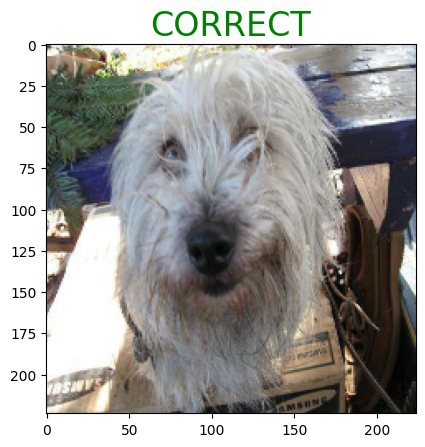

In [ ]:
actual_vs_predicted_breed(0, val_data)

In [ ]:
np.median(predictions[0])

np.float32(0.00017163676)

The highest confidence value for the given image is 0.43439794
Predicted:  irish_wolfhound and Actual breed name:  yorkshire_terrier


'WRONG'

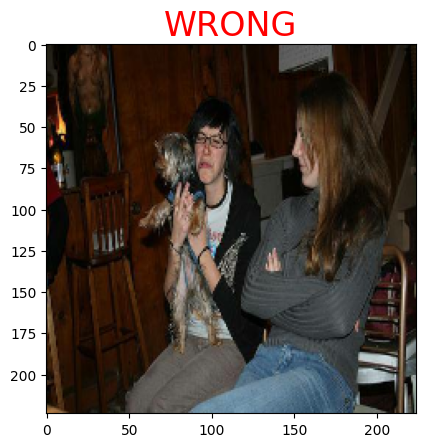

In [ ]:
actual_vs_predicted_breed(10, val_data)

The highest confidence value for the given image is 0.72050774
Predicted:  bloodhound and Actual breed name:  bloodhound


'CORRECT'

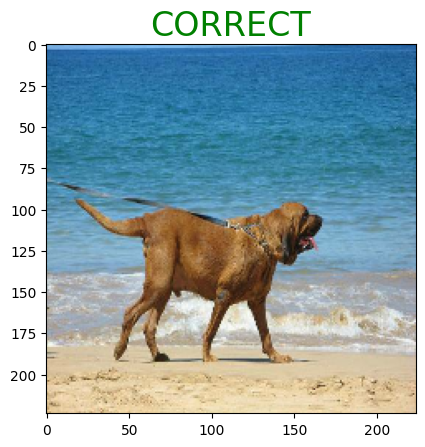

In [ ]:
actual_vs_predicted_breed(100, val_data)

The highest confidence value for the given image is 0.29340148
Predicted:  australian_terrier and Actual breed name:  yorkshire_terrier


'WRONG'

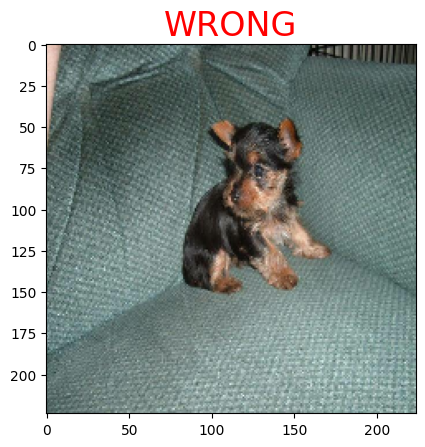

In [ ]:
actual_vs_predicted_breed(12, val_data)

The highest confidence value for the given image is 0.36880362
Predicted:  scotch_terrier and Actual breed name:  scotch_terrier


'CORRECT'

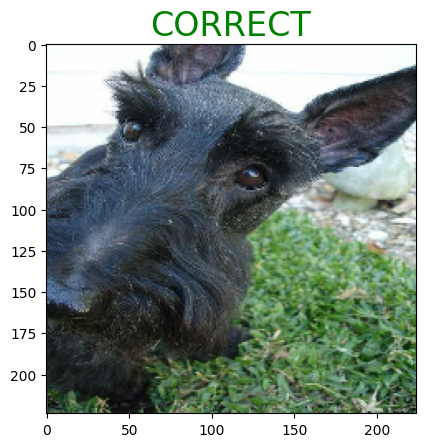

In [ ]:
actual_vs_predicted_breed(1, val_data)

The highest confidence value for the given image is 0.5111073
Predicted:  walker_hound and Actual breed name:  english_foxhound


'WRONG'

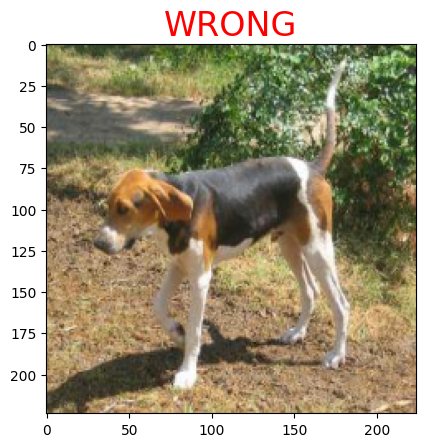

In [ ]:
actual_vs_predicted_breed(42, val_data)

The highest confidence value for the given image is 0.44049987
Predicted:  groenendael and Actual breed name:  groenendael


'CORRECT'

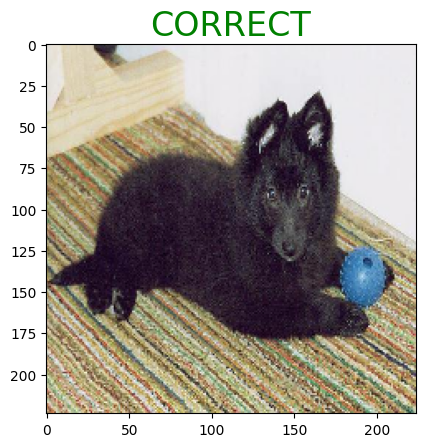

In [ ]:
actual_vs_predicted_breed(77, val_data)

The highest confidence value for the given image is 0.42370918
Predicted:  cardigan and Actual breed name:  kelpie


'WRONG'

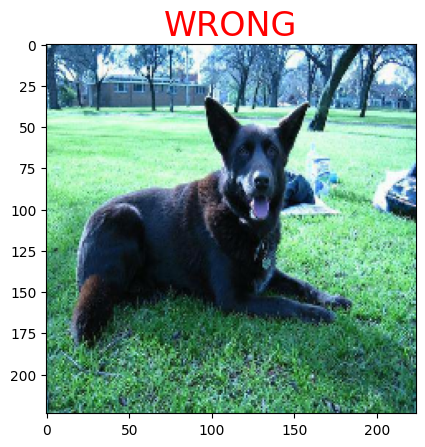

In [ ]:
actual_vs_predicted_breed(121, val_data)

### Here we took one custom image from the Internet and precicted the breed name of the dog using our model.

In [ ]:
im1 = process_image("/content/drive/MyDrive/UDEMY ZTM Neural Network/custom images/irish setter.png")

In [ ]:
im1 = tf.expand_dims(im1, axis=0)  # shape: (1, 224, 224, 3)

In [ ]:
p1 = model.predict(im1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [ ]:
p1[ : 2]

array([[3.18298582e-04, 6.21674844e-05, 1.33775978e-03, 5.31313766e-04,
        9.84443817e-03, 7.79556809e-04, 7.32642948e-04, 1.23263249e-04,
        2.52792932e-04, 8.25568568e-05, 9.98422838e-05, 2.57235952e-05,
        3.96572927e-04, 6.16388570e-04, 2.44630780e-03, 9.75061848e-04,
        9.43644845e-05, 1.70160711e-04, 3.23248305e-03, 6.84330371e-05,
        3.80903715e-04, 1.07420085e-03, 4.25448874e-03, 4.91152059e-05,
        8.22851318e-04, 7.08557549e-04, 1.24266744e-03, 4.35902970e-03,
        7.32434099e-04, 4.98480440e-05, 1.17710629e-03, 4.06472478e-04,
        3.90319823e-04, 2.57050182e-04, 1.34117762e-03, 1.81947471e-04,
        1.88375881e-04, 3.48522374e-03, 1.50348223e-03, 7.11050292e-04,
        1.52368390e-04, 5.63137110e-05, 5.15660387e-04, 5.62631700e-04,
        6.24325592e-04, 8.43527973e-01, 6.77419244e-04, 1.62335590e-03,
        1.27216190e-04, 4.94484033e-04, 1.89978327e-03, 1.23838952e-04,
        5.76362596e-04, 2.20272690e-03, 3.17278289e-04, 1.757732

In [ ]:
get_breed_name(p1) ### AMAZING... THATS THE ACTUAL NAME OF THE DOG

'irish_setter'

### We must Know, what are the top 10 predictions of our model for a particular passed image.

We've made a function that shows for an image, what all does our model predicts it to be (only the first top 10 predictions)

In [ ]:
def plot_top_k(index, k=10, val_data = val_data, predictions = predictions, unique_labels = unique_labels):
    probs = predictions[index]                     # shape: (num_classes,)
    topk_idx = np.argsort(probs)[-k:][::-1]       # top-k indices, desc order [web:36][web:40][web:45]
    topk_probs = probs[topk_idx]

    actual_vs_predicted_breed(index, val_data)

    plt.style.use("fivethirtyeight")
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.bar(range(k), topk_probs, color = "grey")
    ax.set_xticks(range(k))
    ax.set_xticklabels([unique_labels[i] for i in topk_idx], rotation=45, ha='right')
    ax.set_ylabel('Probability')
    ax.set_title(f'Top {k} predictions for sample {index}')
    plt.tight_layout()


The highest confidence value for the given image is 0.42370918
Predicted:  cardigan and Actual breed name:  kelpie


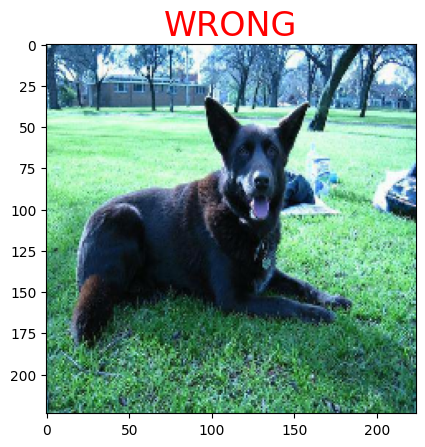

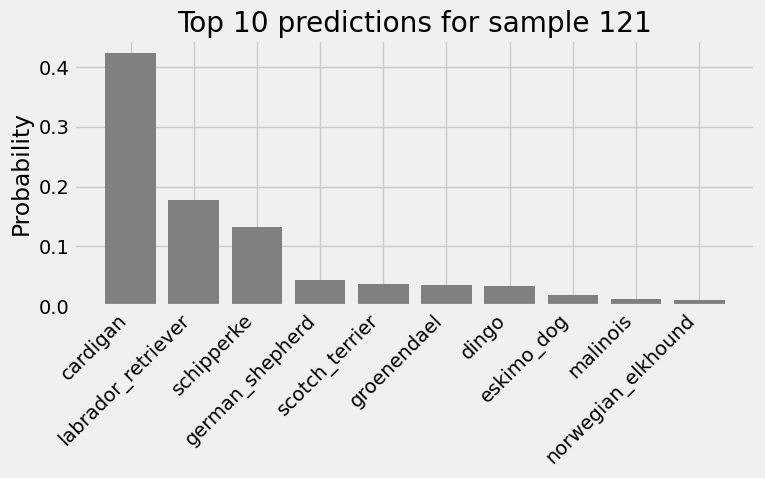

In [ ]:
plot_top_k(121)

The highest confidence value for the given image is 0.9330925
Predicted:  basset and Actual breed name:  basset


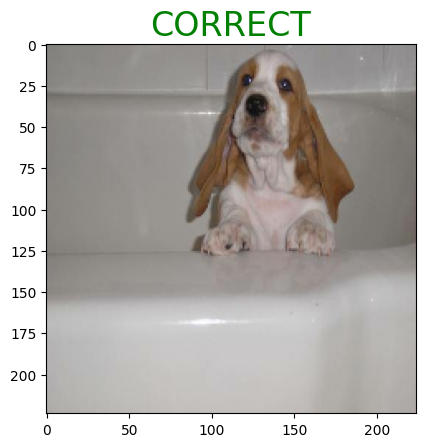

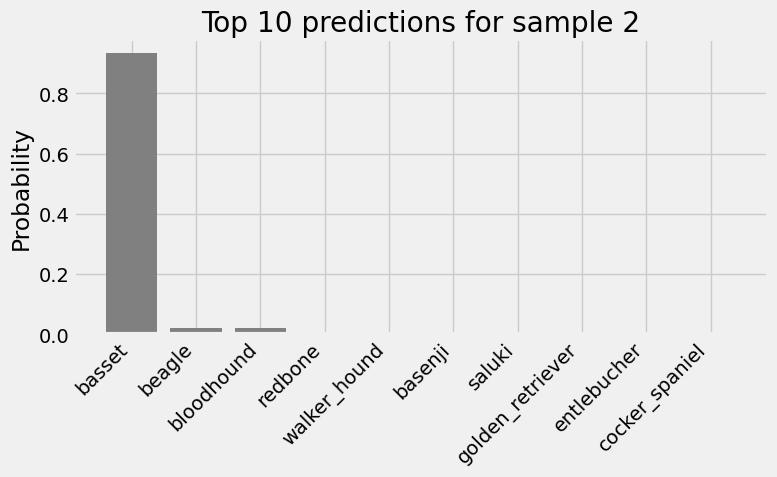

In [ ]:
plot_top_k(2)

## SAVING AND RELOADING A MODEL

In [ ]:
# def save_model(model, suffix = False):
#   """
#   Saves a model in a model directory inside drive.
#   """
#   model_path = "/content/drive/MyDrive/UDEMY ZTM Neural Network/models"+suffix+".keras"
#   model.save(model_path)
#   return model_path

In [ ]:
# def load_model(model_path):
#   """
#   Load the saved model from the specified path.
#   """
#   print("Loading the model from model path", model_path)
#   model = tf.keras.models.load_model(model_path)
#   return model

In [ ]:
# Saving our model trained with the 1000 images
# save_model(model, "1000-images_mobilenetV2_Adam_FirstModel")

'/content/drive/MyDrive/UDEMY ZTM Neural Network/models1000-images_mobilenetV2_Adam_FirstModel.keras'

In [ ]:
# Load the saved model
# loaded_model = load_model("/content/drive/MyDrive/UDEMY ZTM Neural Network/models1000-images_mobilenetV2_Adam_FirstModel.keras")
# pass

In [ ]:
def save_model(model, suffix=""):
    """
    Saves the trained model to Google Drive with custom HubLayer support.
    """
    model_path = f"/content/drive/MyDrive/UDEMY ZTM Neural Network/models/{suffix}.keras"
    model.save(model_path, save_format="keras")  # Keras 3 default
    print(f"Model saved at: {model_path}")
    return model_path

# Example
save_model(model, "_1000-images_mobilenetV2_Adam_FirstModel")

Model saved at: /content/drive/MyDrive/UDEMY ZTM Neural Network/models/_1000-images_mobilenetV2_Adam_FirstModel.keras


'/content/drive/MyDrive/UDEMY ZTM Neural Network/models/_1000-images_mobilenetV2_Adam_FirstModel.keras'

In [ ]:
# from tensorflow.keras.models import load_model

# def load_custom_model(model_path):
#     """
#     Loads the model including the custom HubLayer.
#     """
#     print(f"Loading model from: {model_path}")
#     custom_objects = {"HubLayer": HubLayer}
#     loaded_model = load_model(model_path, custom_objects=custom_objects)
#     return loaded_model

# # Example
# loaded_model = load_custom_model(
#     "/content/drive/MyDrive/UDEMY ZTM Neural Network/models/_1000-images_mobilenetV2_Adam_FirstModel.keras"
# )
pass

In [ ]:
# Let's check the pre-saved model
model.evaluate(val_data)

7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7028 - loss: 1.1601


[1.2838913202285767, 0.6850000023841858]

In [ ]:
# Let's check the above saved and loaded model
# loaded_model.evaluate(val_data)

## Training our model on the complete dataset

In [ ]:
len(X_train), len(y_train)

(800, 800)

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
# create a data batch with the full dataset
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_model = create_model()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# No validation set because training on the entire data thus cant see validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                             patience=3)

NOTE: Now, this might take a lot of time maybe (30 mins) or so because we are training 10k images

In [ ]:
full_model.fit(x = full_data,
               epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard, full_model_early_stopping])

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.4800 - loss: 2.4126
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 773s 2s/step - accuracy: 0.8875 - loss: 0.3911
Epoch 3/10
124/320 ━━━━━━━━━━━━━━━━━━━━ 11:25 3s/step - accuracy: 0.9372 - loss: 0.2353

KeyboardInterrupt: 

In [ ]:
save_model(full_model, "All images-mobilenetV2-Adam")

## We've got the model trained on the entire train data...
The only thing we're left with is to predict the entire test dataset and submit it on kaggle in the format expected

In [ ]:
import os
os.listdir("/content/drive/MyDrive/UDEMY ZTM Neural Network/test")
len(os.listdir("/content/drive/MyDrive/UDEMY ZTM Neural Network/test"))

10357

In [ ]:
test_data_filenames = list(os.listdir("/content/drive/MyDrive/UDEMY ZTM Neural Network/test"))
test_data_filenames[ : 2]

['dd2228d2fbb3ddc8fb350106c2d989ef.jpg',
 'e431adb273c1b705e6e85147990f355e.jpg']

In [ ]:
test_data_filenames = ["/content/drive/MyDrive/UDEMY ZTM Neural Network/test/" + fnames for fnames in test_data_filenames]

In [ ]:
test_data_filenames[ : 4]

['/content/drive/MyDrive/UDEMY ZTM Neural Network/test/dd2228d2fbb3ddc8fb350106c2d989ef.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/test/e431adb273c1b705e6e85147990f355e.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/test/e29f03a924c493b29d17877204dd0205.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/test/e1e6d180a31b0a9c0d741d0f142ea6af.jpg']

In [ ]:
len(test_data_filenames)

10357

In [ ]:
filename[1]

'/content/drive/MyDrive/UDEMY ZTM Neural Network/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg'

In [ ]:
test_data_filenames[1]

'/content/drive/MyDrive/UDEMY ZTM Neural Network/test/e431adb273c1b705e6e85147990f355e.jpg'

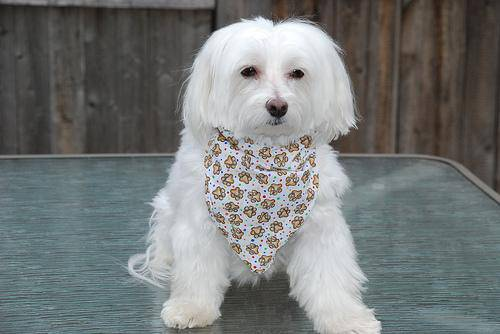

In [ ]:
Image(test_data_filenames[1])

In [ ]:
testimage1 = imread(test_data_filenames[1])
testimage1[ : 2]

array([[[ 94,  92,  95],
        [102, 100, 103],
        [111, 109, 112],
        ...,
        [ 51,  46,  43],
        [ 51,  46,  43],
        [ 51,  46,  43]],

       [[ 85,  83,  86],
        [ 92,  90,  93],
        [101,  99, 102],
        ...,
        [ 51,  46,  43],
        [ 51,  46,  43],
        [ 51,  46,  43]]], dtype=uint8)

In [ ]:
tf.constant(testimage1)

<tf.Tensor: shape=(334, 500, 3), dtype=uint8, numpy=
array([[[ 94,  92,  95],
        [102, 100, 103],
        [111, 109, 112],
        ...,
        [ 51,  46,  43],
        [ 51,  46,  43],
        [ 51,  46,  43]],

       [[ 85,  83,  86],
        [ 92,  90,  93],
        [101,  99, 102],
        ...,
        [ 51,  46,  43],
        [ 51,  46,  43],
        [ 51,  46,  43]],

       [[ 75,  73,  74],
        [ 82,  80,  81],
        [ 90,  88,  89],
        ...,
        [ 52,  47,  44],
        [ 52,  47,  44],
        [ 52,  47,  44]],

       ...,

       [[ 67,  78,  84],
        [ 70,  81,  87],
        [ 73,  84,  90],
        ...,
        [ 98, 119, 122],
        [ 98, 119, 122],
        [ 98, 119, 122]],

       [[ 92, 101, 108],
        [ 91, 100, 107],
        [ 89, 100, 106],
        ...,
        [106, 130, 132],
        [106, 130, 132],
        [106, 130, 132]],

       [[ 94, 103, 110],
        [ 89,  98, 105],
        [ 81,  92,  98],
        ...,
        [ 96, 120, 12

Since our model has been trained on images that are in the form of Tensor batches, to make predictions on the test data, we'll have to get them into the same format.
* We have a function for that `create_data_batches()` that takes a list of filenames as input and converts them into Tensor batches.


To make predictions on the test data we'll:
1. Get the test image filenames.
2. Convert them into tensor batches using `create_data_batches()` and setting the `test_data` parameter to true (as we don't have labels for the test data).
3. Make prediction array by passing the test batches to the `predict()` func called on our model.  

In [ ]:
test_data_filenames[ : 10]

['/content/drive/MyDrive/UDEMY ZTM Neural Network/test/dd2228d2fbb3ddc8fb350106c2d989ef.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/test/e431adb273c1b705e6e85147990f355e.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/test/e29f03a924c493b29d17877204dd0205.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/test/e1e6d180a31b0a9c0d741d0f142ea6af.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/test/e000b7b3b37659a771d0151dc453bc0a.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/test/e0eea374c5170e90dc0b1ee795470ca6.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/test/e71d9f32ea6eb1c2d944e8f4e811c209.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/test/e3a2e1a4c44509d7aa7777d88c5cd45a.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/test/e1cfddc1d5315f1dba011c6152822786.jpg',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/test/e7129bc2dbbba99bedc87c7787cbdf1f.jpg']

In [ ]:
# create test data batch
test_data = create_data_batches(test_data_filenames, test_data=True)

Creating the test batches...


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Now let's make predictions on the test data using the full_model
test_data_predictions = full_model.predict(test_data, verbose = 1)

324/324 ━━━━━━━━━━━━━━━━━━━━ 1064s 3s/step


In [ ]:
# Should save this csv file to access later using numpy.savetxt
np.savetxt("/content/drive/MyDrive/UDEMY ZTM Neural Network/test_data_preds.csv", test_data_predictions, delimiter = ",")

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Loading back the saved test data predictions
test_data_predictions = np.loadtxt("/content/drive/MyDrive/UDEMY ZTM Neural Network/test_data_preds", delimiter = ",")

In [ ]:
test_data_predictions[0]

array([7.52325104e-06, 1.51930159e-04, 3.61401690e-05, 4.25448570e-06,
       1.39719239e-04, 1.25049028e-05, 6.78575532e-07, 4.01865618e-05,
       1.64439552e-05, 1.41409895e-04, 2.04741627e-05, 1.92746185e-04,
       1.90996706e-01, 1.65700185e-05, 4.59764356e-04, 7.74157979e-06,
       1.80232967e-03, 7.06117498e-06, 5.12266206e-06, 5.14806306e-05,
       3.62780178e-04, 2.27253586e-05, 1.25571096e-04, 1.26697076e-02,
       1.53390705e-04, 1.09850644e-05, 3.10383280e-06, 1.51026634e-05,
       9.56218264e-06, 1.09540724e-06, 2.04249791e-05, 6.35138364e-04,
       1.48502309e-04, 1.12005398e-02, 2.79705913e-04, 1.39640842e-05,
       3.69720947e-05, 1.33691792e-04, 2.96637313e-06, 1.46345274e-05,
       7.92656065e-05, 9.88781630e-06, 2.29005180e-02, 1.59334319e-04,
       4.14325332e-05, 4.83189569e-06, 7.38739072e-06, 9.12128871e-06,
       1.23001300e-05, 2.09177291e-04, 1.87096903e-05, 5.51006560e-05,
       2.27603974e-04, 3.50794980e-05, 2.61711248e-05, 5.92581091e-06,
      

### Making it ready for submission on kaggle

https://www.kaggle.com/competitions/dog-breed-identification/data?select=sample_submission.csv

Make a DataFrame with id of each pic and the dog breeds col having probability for each class.

In [ ]:
os.listdir("/content/drive/MyDrive/UDEMY ZTM Neural Network/test")

['dd2228d2fbb3ddc8fb350106c2d989ef.jpg',
 'e431adb273c1b705e6e85147990f355e.jpg',
 'e29f03a924c493b29d17877204dd0205.jpg',
 'e1e6d180a31b0a9c0d741d0f142ea6af.jpg',
 'e000b7b3b37659a771d0151dc453bc0a.jpg',
 'e0eea374c5170e90dc0b1ee795470ca6.jpg',
 'e71d9f32ea6eb1c2d944e8f4e811c209.jpg',
 'e3a2e1a4c44509d7aa7777d88c5cd45a.jpg',
 'e1cfddc1d5315f1dba011c6152822786.jpg',
 'e7129bc2dbbba99bedc87c7787cbdf1f.jpg',
 'e0ccfbe350e0e8bc7bb7e1f95fa07b3b.jpg',
 'eb8d19898e69b355679f98fe068cb06a.jpg',
 'ecb6362d105c0cb84d8e69cfd9b8d0b5.jpg',
 'e86bb44f11c953a6d69c548e756f5a3b.jpg',
 'e90d5b1d2617510402f3620721f7c526.jpg',
 'f28e776762aba6a080ab11ffb40e8d04.jpg',
 'f3e62da9f6f0aec7359dc70c139d7266.jpg',
 'f4bfd6652f7cb8d9e99c7771ba29ab8a.jpg',
 'ed6d16749ad7dbed282857c6c0cb0b64.jpg',
 'ea4a775ecbf81b2cd2967cc34ce4e52b.jpg',
 'e904aa7e76ba608b3f658aa3817e12b9.jpg',
 'f4fa65b062607d69c98f16cb625d5915.jpg',
 'e97b5b2fd6542fa588cd4a5da2b6e052.jpg',
 'e8232c9a79f0e77e9b4c5fca60682d41.jpg',
 'eb407d16321c8c

In [ ]:
import os

In [ ]:
test_base = [os.path.splitext(f) for f in os.listdir("/content/drive/MyDrive/UDEMY ZTM Neural Network/test")]

In [ ]:
len(test_base)

10357

In [ ]:
test_id = [root for (root, ext) in test_base]       # unpack each pair [web:114]
# or using zip to transpose:
test_id, exts = zip(*test_base)                     # tuples of roots and extensions [web:114]
test_id = list(test_id)

In [ ]:
test_id[ : 5]

['dd2228d2fbb3ddc8fb350106c2d989ef',
 'e431adb273c1b705e6e85147990f355e',
 'e29f03a924c493b29d17877204dd0205',
 'e1e6d180a31b0a9c0d741d0f142ea6af',
 'e000b7b3b37659a771d0151dc453bc0a']

In [ ]:
len(test_id)

10357

In [ ]:
sample = pd.read_csv("/content/drive/MyDrive/UDEMY ZTM Neural Network/sample_submission.csv")

In [ ]:
breed_cols = list(sample.columns[1 : ])
breed_cols

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [ ]:
test_data_predictions.shape

(10357, 120)

In [ ]:
submission1 = pd.DataFrame(test_data_predictions, columns=breed_cols)
submission1.shape

(10357, 120)

In [ ]:
submission1.insert(0, "id", test_id)

In [ ]:
submission1.head()

id  affenpinscher  afghan_hound  \
0  dd2228d2fbb3ddc8fb350106c2d989ef   7.523251e-06  1.519302e-04   
1  e431adb273c1b705e6e85147990f355e   7.787514e-07  2.593551e-08   
2  e29f03a924c493b29d17877204dd0205   2.754328e-07  7.638247e-07   
3  e1e6d180a31b0a9c0d741d0f142ea6af   4.259086e-07  1.293253e-07   
4  e000b7b3b37659a771d0151dc453bc0a   1.072322e-08  5.089971e-07   

   african_hunting_dog      airedale  american_staffordshire_terrier  \
0         3.614017e-05  4.254486e-06                    1.397192e-04   
1         6.233171e-06  8.978209e-07                    2.943655e-07   
2         4.342760e-03  7.590965e-07                    6.784931e-06   
3         1.080480e-06  1.600590e-06                    7.185094e-07   
4         1.840696e-08  8.360210e-06                    1.104269e-06   

    appenzeller  australian_terrier       basenji        basset  ...  \
0  1.250490e-05        6.785755e-07  4.018656e-05  1.644396e-05  ...   
1  5.518703e-06        6.725182e-07  2.748659e-07  1.625860e-08  ...   
2  3.356474e-07        3.193122e-04  7.102570e-08  6.429479e-07  ...   
3  1.741724e-08        7.254484e-07  5.361677e-08  1.916928e-08  ...   
4  2.943723e-07        1.319798e-08  9.767957e-07  3.055877e-07  ...   

     toy_poodle   toy_terrier        vizsla  walker_hound    weimaraner  \
0  1.729870e-05  1.586413e-03  2.072214e-04  3.081600e-06  6.614599e-04   
1  9.757235e-06  2.735898e-06  1.191081e-05  1.334349e-07  5.412385e-06   
2  2.188095e-04  2.878721e-06  2.563923e-06  6.965927e-07  1.702696e-05   
3  3.649107e-06  1.651778e-06  7.115560e-07  3.241681e-07  2.885273e-06   
4  3.613169e-09  2.337376e-07  1.160398e-08  2.264438e-06  5.526130e-08   

   welsh_springer_spaniel  west_highland_white_terrier       whippet  \
0            7.468589e-05                 1.585317e-06  6.830331e-06   
1            1.010314e-06                 1.112497e-06  4.725513e-06   
2            2.285741e-05                 9.391644e-06  3.795722e-06   
3            1.257753e-06                 1.668476e-06  2.567473e-04   
4            1.515213e-07                 5.542227e-08  2.485010e-07   

   wire-haired_fox_terrier  yorkshire_terrier  
0             1.608624e-05       2.985997e-06  
1             1.380246e-05       1.432689e-07  
2             1.822002e-05       8.795795e-07  
3             3.179056e-06       5.751277e-07  
4             7.283477e-09       3.682734e-06  

[5 rows x 121 columns]

In [ ]:
submission1.shape

(10357, 121)

In [ ]:
submission1.to_csv("/content/drive/MyDrive/UDEMY ZTM Neural Network/submissions/submission1.csv", index = False)

In [ ]:
sample.head()

id  affenpinscher  afghan_hound  \
0  000621fb3cbb32d8935728e48679680e       0.008333      0.008333   
1  00102ee9d8eb90812350685311fe5890       0.008333      0.008333   
2  0012a730dfa437f5f3613fb75efcd4ce       0.008333      0.008333   
3  001510bc8570bbeee98c8d80c8a95ec1       0.008333      0.008333   
4  001a5f3114548acdefa3d4da05474c2e       0.008333      0.008333   

   african_hunting_dog  airedale  american_staffordshire_terrier  appenzeller  \
0             0.008333  0.008333                        0.008333     0.008333   
1             0.008333  0.008333                        0.008333     0.008333   
2             0.008333  0.008333                        0.008333     0.008333   
3             0.008333  0.008333                        0.008333     0.008333   
4             0.008333  0.008333                        0.008333     0.008333   

   australian_terrier   basenji    basset  ...  toy_poodle  toy_terrier  \
0            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
1            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
2            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
3            0.008333  0.008333  0.008333  ...    0.008333     0.008333   
4            0.008333  0.008333  0.008333  ...    0.008333     0.008333   

     vizsla  walker_hound  weimaraner  welsh_springer_spaniel  \
0  0.008333      0.008333    0.008333                0.008333   
1  0.008333      0.008333    0.008333                0.008333   
2  0.008333      0.008333    0.008333                0.008333   
3  0.008333      0.008333    0.008333                0.008333   
4  0.008333      0.008333    0.008333                0.008333   

   west_highland_white_terrier   whippet  wire-haired_fox_terrier  \
0                     0.008333  0.008333                 0.008333   
1                     0.008333  0.008333                 0.008333   
2                     0.008333  0.008333                 0.008333   
3                     0.008333  0.008333                 0.008333   
4                     0.008333  0.008333                 0.008333   

   yorkshire_terrier  
0           0.008333  
1           0.008333  
2           0.008333  
3           0.008333  
4           0.008333  

[5 rows x 121 columns]

# Now Making it ready to deploy on the site

Thus testing on the custom images, we have added them in our custom images folder

In [ ]:
# Importing necessary
import tensorflow as tf
import tensorflow_hub as hub
import os

In [ ]:
# Preparing the custom images file paths
os.listdir("drive/My Drive/UDEMY ZTM Neural Network/custom images")

['irish setter.png', 'tibetan mastiff.png', 'Mastiff.png']

In [ ]:
custom_image_filepaths = ["/content/drive/MyDrive/UDEMY ZTM Neural Network/custom images/" + img for img in os.listdir("drive/My Drive/UDEMY ZTM Neural Network/custom images")]
custom_image_filepaths

['/content/drive/MyDrive/UDEMY ZTM Neural Network/custom images/irish setter.png',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/custom images/tibetan mastiff.png',
 '/content/drive/MyDrive/UDEMY ZTM Neural Network/custom images/Mastiff.png']

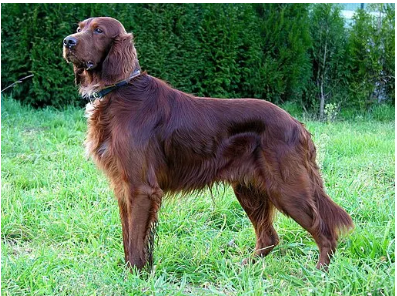

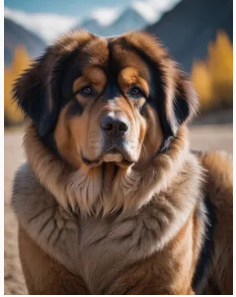

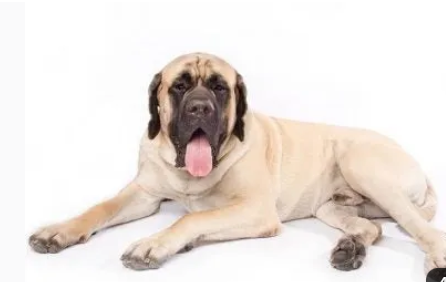

In [ ]:
# Let's see our custom image dataset
from IPython.display import Image

for i in range(3):
  display(Image(custom_image_filepaths[i]))

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_filepaths, test_data = True)

Creating the test batches...


In [ ]:
custom_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Making predictions on the custom data

custom_preds = model.predict(custom_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 788ms/step


In [ ]:
custom_preds.shape

(3, 120)

In [ ]:
custom_preds[0]

array([6.65867992e-04, 3.03252484e-04, 1.90724168e-04, 1.25917222e-03,
       5.19787632e-02, 1.34205876e-03, 2.72526965e-03, 3.46780813e-04,
       9.52756847e-04, 4.27135055e-05, 3.48557165e-04, 2.62424612e-04,
       5.49707212e-04, 2.07107732e-04, 6.91827852e-04, 1.08833576e-03,
       2.49101140e-04, 1.41550598e-04, 2.96390709e-03, 7.76238623e-04,
       6.49793132e-04, 6.35193952e-04, 5.01529453e-03, 6.51178998e-05,
       9.46895278e-04, 7.52164691e-04, 3.25735455e-04, 5.13308821e-03,
       1.05911959e-03, 3.52417526e-04, 1.83851877e-03, 1.47460646e-03,
       4.53272136e-04, 1.02568985e-04, 3.84372077e-04, 2.37963410e-04,
       3.23767134e-04, 7.14543136e-03, 4.86212608e-04, 3.57113522e-03,
       9.83510690e-05, 6.87518157e-04, 2.73189880e-03, 2.13033360e-04,
       4.28503496e-04, 7.76535571e-01, 1.21747587e-04, 8.76410864e-04,
       4.81495808e-04, 3.81268852e-04, 1.49471231e-03, 5.52628371e-05,
       3.89080058e-04, 6.50790695e-04, 5.99492167e-04, 1.32580614e-03,
      

In [ ]:
 get_breed_name(custom_preds[0]), get_breed_name(custom_preds[1]), get_breed_name(custom_preds[2])

('irish_setter', 'leonberg', 'saint_bernard')